## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!
import csv
import pandas as pd

In [2]:


movie_gross = pd.read_csv('bom.movie_gross.csv')

movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [3]:
import sqlite3
import pandas as pd

# Create a connection to the database
conn = sqlite3.connect('im.db')

# Load the movie_basics table into a DataFrame
movie_basics = pd.read_sql_query('SELECT * FROM movie_basics', conn)

# Close the database connection
conn.close()

# Print the first 5 rows of the DataFrame
movie_basics



,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [4]:
movie_gross = movie_gross.rename(columns={'title': 'primary_title'})
movie_gross

,primary_title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [6]:
#Combine or merge movie_gross with movie_basics using an inner join.

merged_df = pd.merge(movie_gross, movie_basics, on='primary_title', how='inner')


merged_df 

,primary_title,studio,domestic_gross,foreign_gross,year,movie_id,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...
3361,Souvenir,Strand,11400.0,NaN,2018,tt2389092,Souvenir,2014,86.0,"Comedy,Romance"
3362,Souvenir,Strand,11400.0,NaN,2018,tt3478898,Souvenir,2014,86.0,Documentary
3363,Beauty and the Dogs,Osci.,8900.0,NaN,2018,tt6776572,Aala Kaf Ifrit,2017,100.0,"Crime,Drama,Thriller"
3364,The Quake,Magn.,6200.0,NaN,2018,tt6523720,Skjelvet,2018,106.0,"Action,Drama,Thriller"


In [7]:

# Lets now explore the ratings table
conn = sqlite3.connect('im.db')

# Load the movie_basics table into a DataFrame
movie_ratings = pd.read_sql_query('SELECT * FROM movie_ratings', conn)

# Close the database connection
conn.close()

#do a second merge with movie_ratings 
df = pd.merge(merged_df, movie_ratings, on='movie_id', how='inner')
df

,primary_title,studio,domestic_gross,foreign_gross,year,movie_id,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690
...,...,...,...,...,...,...,...,...,...,...,...,...
3022,Souvenir,Strand,11400.0,NaN,2018,tt2387692,Souvenir,2016,90.0,"Drama,Music,Romance",6.0,823
3023,Souvenir,Strand,11400.0,NaN,2018,tt2389092,Souvenir,2014,86.0,"Comedy,Romance",5.9,9
3024,Beauty and the Dogs,Osci.,8900.0,NaN,2018,tt6776572,Aala Kaf Ifrit,2017,100.0,"Crime,Drama,Thriller",7.0,1016
3025,The Quake,Magn.,6200.0,NaN,2018,tt6523720,Skjelvet,2018,106.0,"Action,Drama,Thriller",6.2,5270


In [8]:
#remove null values
cleaned_df = df.dropna()

In [9]:
cleaned_df

,primary_title,studio,domestic_gross,foreign_gross,year,movie_id,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690
...,...,...,...,...,...,...,...,...,...,...,...,...
2927,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,tt3576728,Bilal: A New Breed of Hero,2015,105.0,"Action,Adventure,Animation",8.0,16854
2930,I Still See You,LGF,1400.0,1500000,2018,tt2160105,I Still See You,2018,98.0,"Fantasy,Thriller",5.7,5010
2940,The Catcher Was a Spy,IFC,725000.0,229000,2018,tt4602066,The Catcher Was a Spy,2018,98.0,"Biography,Drama,War",6.2,4653
2959,Time Freak,Grindstone,10000.0,256000,2018,tt6769280,Time Freak,2018,104.0,"Comedy,Drama,Romance",5.7,3455


In [10]:
# drop duplicates
df = cleaned_df.drop_duplicates()
df

,primary_title,studio,domestic_gross,foreign_gross,year,movie_id,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690
...,...,...,...,...,...,...,...,...,...,...,...,...
2927,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,tt3576728,Bilal: A New Breed of Hero,2015,105.0,"Action,Adventure,Animation",8.0,16854
2930,I Still See You,LGF,1400.0,1500000,2018,tt2160105,I Still See You,2018,98.0,"Fantasy,Thriller",5.7,5010
2940,The Catcher Was a Spy,IFC,725000.0,229000,2018,tt4602066,The Catcher Was a Spy,2018,98.0,"Biography,Drama,War",6.2,4653
2959,Time Freak,Grindstone,10000.0,256000,2018,tt6769280,Time Freak,2018,104.0,"Comedy,Drama,Romance",5.7,3455


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1767 entries, 0 to 3001
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    1767 non-null   object 
 1   studio           1767 non-null   object 
 2   domestic_gross   1767 non-null   float64
 3   foreign_gross    1767 non-null   object 
 4   year             1767 non-null   int64  
 5   movie_id         1767 non-null   object 
 6   original_title   1767 non-null   object 
 7   start_year       1767 non-null   int64  
 8   runtime_minutes  1767 non-null   float64
 9   genres           1767 non-null   object 
 10  averagerating    1767 non-null   float64
 11  numvotes         1767 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 179.5+ KB


In [36]:
#change foreign_gross from object to float


df['foreign_gross'] = pd.to_numeric(cleaned_df['foreign_gross'], errors='coerce')
#create new column total_gross that adds the sum of foreign_gross to domestic_gross
df['total_gross'] = df['foreign_gross'] + df['domestic_gross']




In [37]:
# Extract the unique genres
unique_genres = df['genres'].unique()

# Count the number of unique genres
num_genres = len(unique_genres)
num_genres

260

In [52]:
#find mean perfomance of each genre by revenues
average_genre_gross= df.groupby('genres')['total_gross'].mean()
# Set the float format to display two decimal places
pd.options.display.float_format = '{:.2f}'.format
average_genre_gross

genres
Action                        51467562.38
Action,Adventure               2041750.00
Action,Adventure,Animation   378712647.06
Action,Adventure,Biography   207082250.00
Action,Adventure,Comedy      386604555.96
                                 ...     
Romance,Sci-Fi,Thriller      127900000.00
Romance,Thriller               6834150.00
Sci-Fi                       821900000.00
Thriller                      79384380.00
Thriller,Western                321100.00
Name: total_gross, Length: 260, dtype: float64

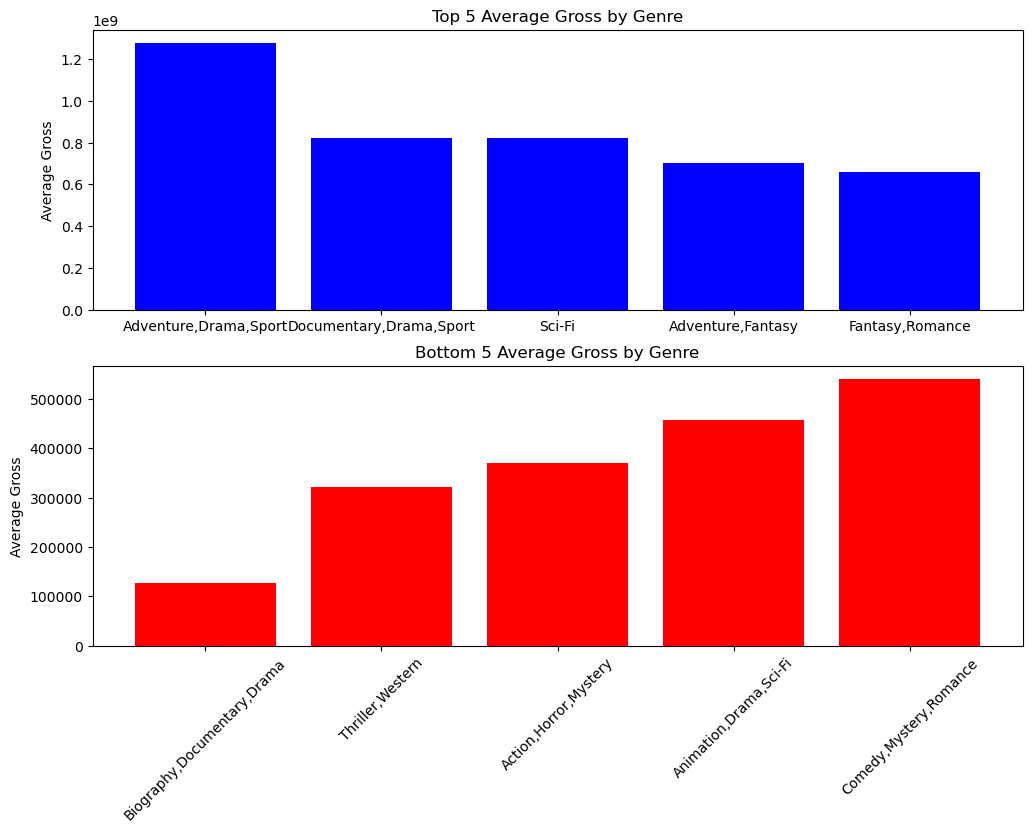

In [54]:
#visualize
import matplotlib.pyplot as plt


# Sort the data in descending order and get the top 5 and bottom 5
top_5 = average_genre_gross.sort_values(ascending=False)[:5]
bottom_5 = average_genre_gross.sort_values()[:5]
pd.options.display.float_format = '{:.2f}'.format

# Plot the top 5 and bottom 5 average gross
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

# Top 5
axes[0].bar(top_5.index, top_5.values, color='blue')
axes[0].set_ylabel('Average Gross')
axes[0].set_title('Top 5 Average Gross by Genre')
# Rotate the x-axis labels
plt.xticks(rotation=45)

# Bottom 5
axes[1].bar(bottom_5.index, bottom_5.values, color='red')
axes[1].set_ylabel('Average Gross')
axes[1].set_title('Bottom 5 Average Gross by Genre')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()



In [17]:
"""My advice to Microsoft would be to venture on (Adventure,Drama,Sport),(Documentary, Drama, Sport), Sci-fi. Being a tech company there is a lot of thought leadership they can bring through documentaries and Sci-fi"""

'My advice to Microsoft would be to venture on (Adventure,Drama,Sport),(Documentary, Drama, Sport), Sci-fi. Being a tech company there is a lot of thought leadership they can bring through documentaries and Sci-fi'

In [48]:
# Lets now visualize genre versus ratings

#find mean perfomance of each genre by ratings score
average_genre_rating = df.groupby('genres')['averagerating'].mean()
average_genre_rating = round(average_genre_rating, 2)
average_genre_rating

genres
Action                        6.24
Action,Adventure              6.05
Action,Adventure,Animation    7.42
Action,Adventure,Biography    7.00
Action,Adventure,Comedy       6.53
                              ... 
Romance,Sci-Fi,Thriller       7.10
Romance,Thriller              5.85
Sci-Fi                        4.20
Thriller                      5.94
Thriller,Western              6.40
Name: averagerating, Length: 260, dtype: float64

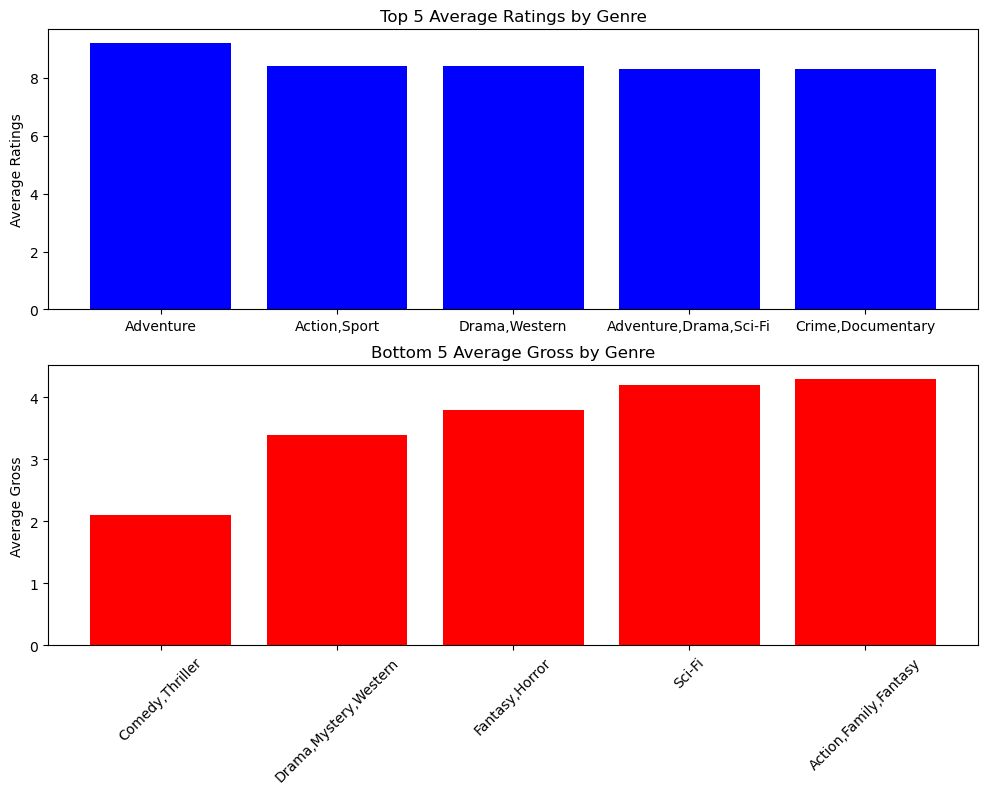

In [19]:
# Sort the data in descending order and get the top 5 and bottom 5
top_5 = average_genre_rating.sort_values(ascending=False)[:5]
bottom_5 = average_genre_rating.sort_values()[:5]

# Plot the top 5 and bottom 5 average gross
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

# Top 5
axes[0].bar(top_5.index, top_5.values, color='blue')
axes[0].set_ylabel('Average Ratings')
axes[0].set_title('Top 5 Average Ratings by Genre')
# Rotate the x-axis labels
plt.xticks(rotation=45)

# Bottom 5
axes[1].bar(bottom_5.index, bottom_5.values, color='red')
axes[1].set_ylabel('Average Gross')
axes[1].set_title('Bottom 5 Average Gross by Genre')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

Correlation between rating and gross revenue: 0.16684428441671412


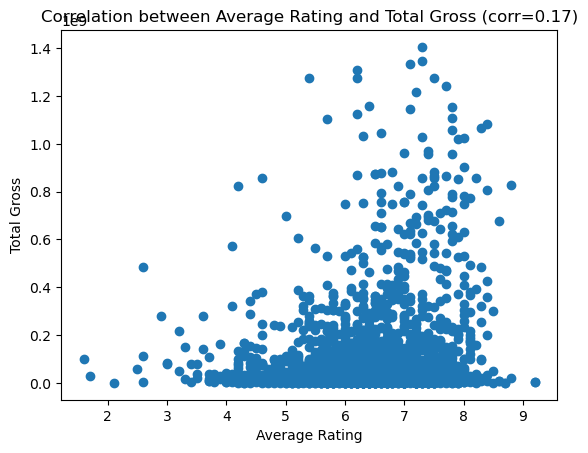

In [45]:
# Compute the correlation between rating and gross revenue
corr = df['averagerating'].corr(df['total_gross'])
# Plot a scatter plot of 'averagerating' and 'total_gross'
plt.scatter(df['averagerating'], df['total_gross'])
# Set the title and axis labels
plt.title(f"Correlation between Average Rating and Total Gross (corr={corr:.2f})")
plt.xlabel('Average Rating')
plt.ylabel('Total Gross')

# Print the correlation coefficient
print("Correlation between rating and gross revenue:", corr)

In [22]:
"""There is a small positive correlation between rating and revenue so I would not put too much ephasis on ratings when making a commercial decision"""

'There is a small positive correlation between rating and revenue so I would not put too much ephasis on ratings when making a commercial decision'